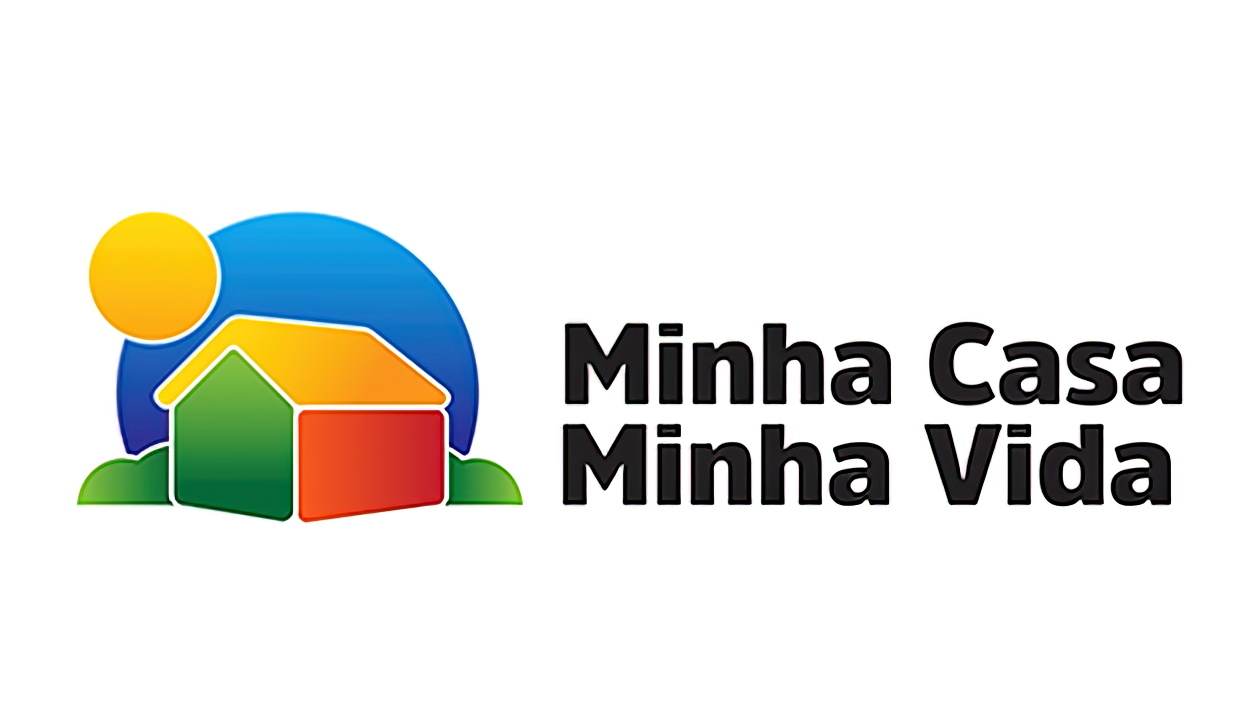

# Análise dos dados do Minha Casa Minha Vida - Financiado com FGTS

https://www.gov.br/cidades/pt-br/acesso-a-informacao/acoes-e-programas/habitacao/programa-minha-casa-minha-vida/bases-de-dados-do-programa-minha-casa-minha-vida

referência 01/11/2024 - indo de 2009 a 2024

**Pontos analisados:**
- Quais anos com maior e menor frequencia de financiamento.
- Quais os municípios e estados que mais tiveram financiamento.
- Análise da variação de UHs financiadas e valor de financiamento ao longo dos anos.
- Análise do subsidiio ao longo dos anos.
- Correlação entre UHs financiadas e o valor do financiamento e do subsidio utilizado.

**O que é Minha Casa, Minha Vida?**

O Minha Casa, Minha Vida (MCMV) é uma iniciativa habitacional do governo federal do Brasil, criada pelo presidente Lula em março de 2009. Gerenciado pelo Ministério das Cidades, o programa oferece subsídios e taxas de juros reduzidas para tornar mais acessível a aquisição de moradias populares, tanto em áreas urbanas quanto rurais, com o objetivo de combater o déficit habitacional no País. Desde a sua criação, o programa já entregou mais de 6 milhões de habitações.

**O que é FGTS?**

O Fundo de Garantia do Tempo de Serviço (FGTS) foi criado com o objetivo de proteger o trabalhador demitido sem justa causa, mediante a abertura de uma conta vinculada ao contrato de trabalho.
Entre as opções para o saque do Fundo de Garantia estão previstas:
- Aposentadoria
- Aquisição de casa própria, liquidação ou amortização de dívida ou pagamento de parte das prestações de financiamento habitacional
- Saque-aniversário
- Desastre natural (Saque Calamidade)
- Demissão, sem justa causa, pelo empregador
- Outros


In [28]:
#importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
#lendo nossos dados
df = pd.read_csv('fgts_dem.csv', sep=';')
df.head()

,data_referencia,cod_ibge,txt_municipio,txt_uf,num_ano_financiamento,qtd_uh_financiadas,vlr_financiamento,vlr_subsidio
0,01/11/2024,110.001,Alta Floresta D'Oeste,RO,2009,2.0,106.000,28.406
1,01/11/2024,110.001,Alta Floresta D'Oeste,RO,2010,11.0,"598.983,79",129.620
2,01/11/2024,110.001,Alta Floresta D'Oeste,RO,2011,9.0,"450.560,20",35.436
3,01/11/2024,110.001,Alta Floresta D'Oeste,RO,2012,26.0,"1.711.299,54","532.644,40"
4,01/11/2024,110.001,Alta Floresta D'Oeste,RO,2013,33.0,"2.331.474,54","690.322,69"


In [3]:
df.shape

(57859, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57859 entries, 0 to 57858
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_referencia        57859 non-null  object 
 1   cod_ibge               57859 non-null  float64
 2   txt_municipio          57859 non-null  object 
 3   txt_uf                 57859 non-null  object 
 4   num_ano_financiamento  57859 non-null  int64  
 5   qtd_uh_financiadas     57859 non-null  float64
 6   vlr_financiamento      57859 non-null  object 
 7   vlr_subsidio           57859 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.5+ MB


In [30]:
#Transformando valores que deveriam ser numéricos mas estão como objeto
#(colunas: vlr_financiamento, vlr_subsidio)
df['vlr_financiamento'] = pd.to_numeric(df['vlr_financiamento'], errors='coerce')
df['vlr_subsidio'] = pd.to_numeric(df['vlr_subsidio'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57859 entries, 0 to 57858
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_referencia        57859 non-null  object 
 1   cod_ibge               57859 non-null  float64
 2   txt_municipio          57859 non-null  object 
 3   txt_uf                 57859 non-null  object 
 4   num_ano_financiamento  57859 non-null  int64  
 5   qtd_uh_financiadas     57859 non-null  float64
 6   vlr_financiamento      13085 non-null  float64
 7   vlr_subsidio           12763 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.5+ MB


**Resumo estatístico das variáveis numéricas:**

In [7]:
df['qtd_uh_financiadas'].describe().round(3)

,qtd_uh_financiadas
count,57859.000
mean,53.876
std,124.337
min,1.000
25%,2.286
50%,9.000
75%,41.000
max,999.000


In [8]:
df['vlr_financiamento'].describe().round(3)

,vlr_financiamento
count,13085.000
mean,182.997
std,179.663
min,1.500
25%,68.900
50%,114.000
75%,228.000
max,999.860


In [9]:
df['vlr_subsidio'].describe().round(3)

,vlr_subsidio
count,12763.000
mean,105.132
std,192.711
min,0.000
25%,1.755
50%,22.063
75%,102.040
max,997.966


In [10]:
df.isna().value_counts()

data_referencia  cod_ibge  txt_municipio  txt_uf  num_ano_financiamento  qtd_uh_financiadas  vlr_financiamento  vlr_subsidio
False            False     False          False   False                  False               True               True            37851
                                                                                             False              True             7245
                                                                                             True               False            6923
                                                                                             False              False            5840
Name: count, dtype: int64

In [11]:
#trocando valores NAN pela média dos valores de financiamento e subsidio
df['vlr_financiamento'] = df['vlr_financiamento'].fillna(df['vlr_financiamento'].mean())
df['vlr_subsidio'] = df['vlr_subsidio'].fillna(df['vlr_subsidio'].mean())
df.isna().value_counts()

,,,,,,,,count
data_referencia,cod_ibge,txt_municipio,txt_uf,num_ano_financiamento,qtd_uh_financiadas,vlr_financiamento,vlr_subsidio,
False,False,False,False,False,False,False,False,57859


In [12]:
#verificando os registros por estado
df['txt_municipio'].value_counts()
df['txt_uf'].value_counts()

,count
txt_uf,
SP,8986
MG,8776
RS,6155
PR,5558
SC,3877
GO,3108
BA,2885
PE,1861
CE,1732


In [13]:
#verificando os registros por ano
ano_fin = df['num_ano_financiamento'].value_counts().sort_index()
ano_fin

,count
num_ano_financiamento,
2009,3876
2010,3951
2011,3893
2012,3837
2013,3969
2014,4010
2015,4010
2016,3741
2017,3591


# **Análises Gráficas**

**Anos com maior e menor frequência de financiamento com FGTS:**

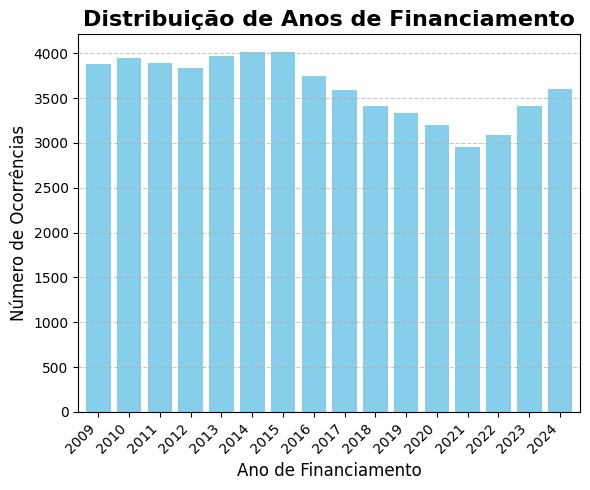

In [14]:
plt.figure(figsize=(6,5))
ano_fin.plot(kind='bar', color='skyblue', width=0.8)
plt.title('Distribuição de Anos de Financiamento', fontsize=16, weight='bold')
plt.xlabel('Ano de Financiamento', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Os anos de 2014 e 2015 foram os maiores anos com financiamento utilizando o FGTS. Enquanto notamos uma queda nos próximos anos e uma redução ainda maior no período mais crítico de pandemia no ano de 2021, retomando em crescente a partir de 2022 até 2024.

**Maior frequência de financiamento com FGTS por município e por estado:**

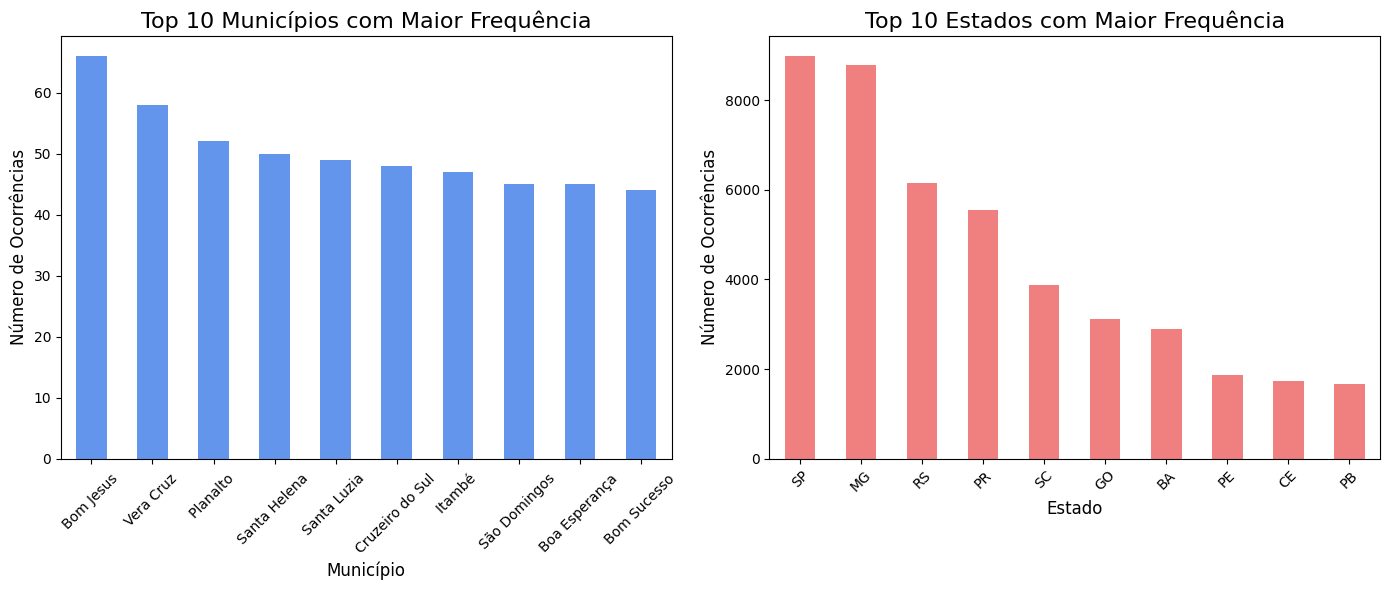

In [15]:
municipios = df['txt_municipio'].value_counts().head(10)  #limita aos 10 primeiros municípios mais frequentes
ufs = df['txt_uf'].value_counts().head(10)  #limita aos 10 estados mais frequentes

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

municipios.plot(kind='bar', color='cornflowerblue', ax=ax[0])
ax[0].set_title('Top 10 Municípios com Maior Frequência', fontsize=16)
ax[0].set_xlabel('Município', fontsize=12)
ax[0].set_ylabel('Número de Ocorrências', fontsize=12)
ax[0].tick_params(axis='x', rotation=45, labelsize=10)

ufs.plot(kind='bar', color='lightcoral', ax=ax[1])
ax[1].set_title('Top 10 Estados com Maior Frequência', fontsize=16)
ax[1].set_xlabel('Estado', fontsize=12)
ax[1].set_ylabel('Número de Ocorrências', fontsize=12)
ax[1].tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout()
plt.show()

**Análise da variação de UHs financiadas e valor de financiamento ao longo dos anos:**

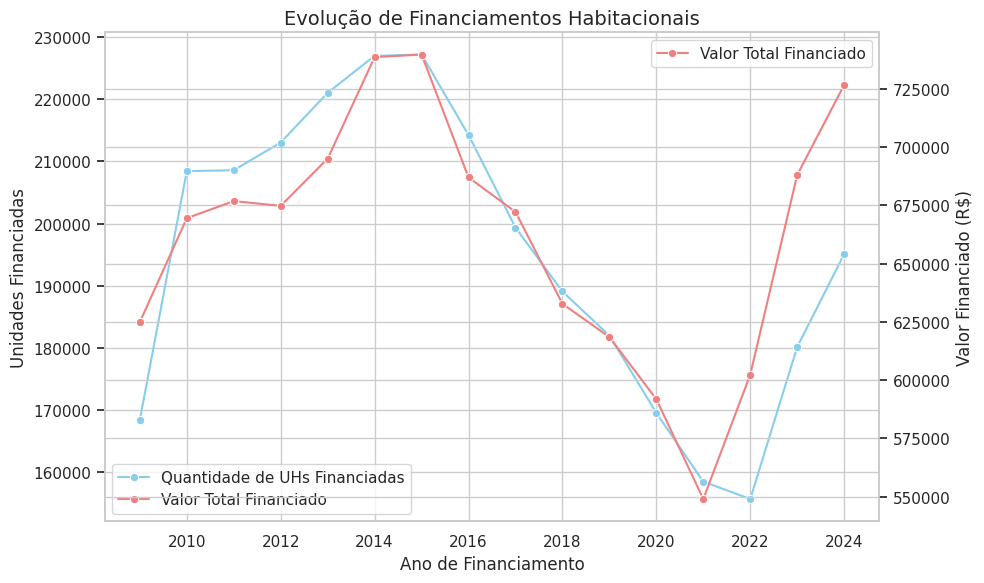

In [16]:
#agregando os dados por ano antes do plot do gráfico
df_aggregated = df.groupby('num_ano_financiamento')[['qtd_uh_financiadas', 'vlr_financiamento']].sum().reset_index()

sns.set(style='whitegrid') #gráfico com fundo de grade para melçhor observação

fig, ax1 = plt.subplots(figsize=(10,6))

#definindo e criando o primeiro eixo da série temporal:
ax1 = sns.lineplot(x='num_ano_financiamento', y='qtd_uh_financiadas', data=df_aggregated,
                   marker='o', label='Quantidade de UHs Financiadas', color='skyblue')

#definindo e criando o segundo eixo da série temporal:
ax2 = ax1.twinx() #twinx() cria um segundo eixo Y que compartilha o mesmo eixo X do código anterior
ax2 = sns.lineplot(x='num_ano_financiamento', y='vlr_financiamento', data=df_aggregated,
                   marker='o', label='Valor Total Financiado', color='lightcoral')

ax1.set_title("Evolução de Financiamentos Habitacionais", fontsize=14)
ax1.set_xlabel("Ano de Financiamento", fontsize=12)
ax1.set_ylabel("Unidades Financiadas", fontsize=12)
ax2.set_ylabel("Valor Financiado (R$)", fontsize=12)
#combinando e exibindo as legendas de ambos os eixos criados:
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower left")
plt.tight_layout()
plt.show()

**Subsidio ao longo dos anos:**

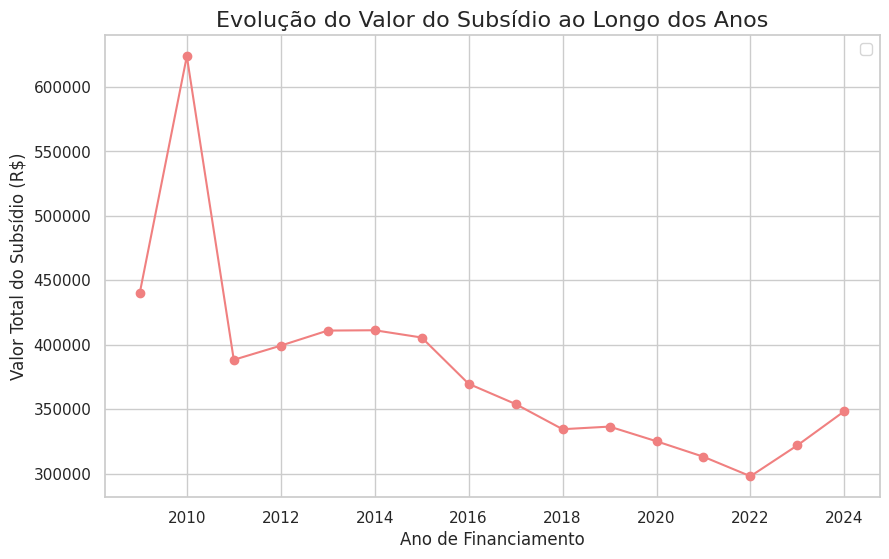

In [17]:
#agrupando o subsidio pelos anos
subsídio_por_ano = df.groupby("num_ano_financiamento")["vlr_subsidio"].sum().reset_index()

#seguindo com o estilo do gráfico anterior
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(subsídio_por_ano["num_ano_financiamento"], subsídio_por_ano["vlr_subsidio"],
         marker='o', color='lightcoral')
plt.title("Evolução do Valor do Subsídio ao Longo dos Anos", fontsize=16)
plt.xlabel("Ano de Financiamento", fontsize=12)
plt.ylabel("Valor Total do Subsídio (R$)", fontsize=12)
plt.legend()
plt.show()

**Correlação entre UHs financiadas e o valor do financiamento e do subsidio utilizado:**

Text(0.5, 1.0, 'Correlação entre UHs Financiadas, Valor do Financiamento e Subsídio')

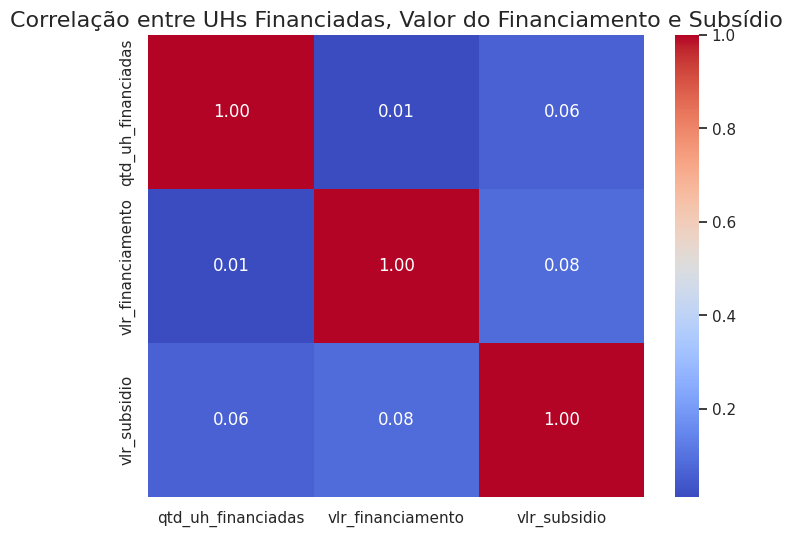

In [22]:
dados_correla = df[["qtd_uh_financiadas", "vlr_financiamento", "vlr_subsidio"]]
correlacoes = dados_correla.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre UHs Financiadas, Valor do Financiamento e Subsídio", fontsize=16)

Quase não há correlações numéricas.